In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('historical-gov-spending-gdp.csv')
df.head()

,Entity,Code,Year,Government Expenditure (IMF based on Mauro et al. (2015))
0,Afghanistan,AFG,2003,14.066129
1,Afghanistan,AFG,2004,15.657322
2,Afghanistan,AFG,2005,17.206297
3,Afghanistan,AFG,2006,21.535529
4,Afghanistan,AFG,2007,21.991904


In [3]:
earliest_recording_per_entity = df.groupby('Entity')['Year'].min()
earliest_entities = earliest_recording_per_entity[earliest_recording_per_entity < 1901].index

earliest_entities_df = df[df['Entity'].isin(earliest_entities)]
earliest_entities_df = earliest_entities_df.rename(columns={'Government Expenditure (IMF based on Mauro et al. (2015))': 'Expenditure'})
earliest_entities_df.head()

,Entity,Code,Year,Expenditure
58,Argentina,ARG,1880,10.18703
59,Argentina,ARG,1881,10.60800
60,Argentina,ARG,1882,12.98165
61,Argentina,ARG,1883,12.59537
62,Argentina,ARG,1884,12.52486


In [4]:
per_capita_expenditure = pd.read_csv('total-gov-expenditure-percapita-OECD.csv')
per_capita_expenditure.head()

,Entity,Code,Year,Total government spending per capita
0,Australia,AUS,2009,15670.84
1,Australia,AUS,2010,15484.24
2,Australia,AUS,2011,16146.34
3,Australia,AUS,2012,15628.89
4,Australia,AUS,2013,17186.98


<AxesSubplot:xlabel='Year', ylabel='expenditure'>

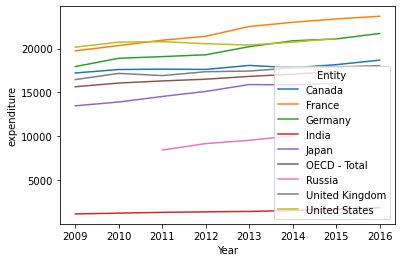

In [5]:
per_capita_expenditure = per_capita_expenditure.rename(columns={'Total government spending per capita': 'expenditure'})
per_capita_expenditure['Entity'].unique()
per_capita_expenditure_entities_subset = ['OECD - Total', 'Brazil', 'Canada', 'France', 'Germany', 'India', 'Japan', 'Russia', 'United Kingdom', 'United States']
per_capita_expenditure_subset = per_capita_expenditure[per_capita_expenditure['Entity'].isin(per_capita_expenditure_entities_subset)]
per_capita_expenditure_subset.head()
sns.lineplot(x='Year', y='expenditure', hue='Entity', data=per_capita_expenditure_subset)

<AxesSubplot:xlabel='Entity', ylabel='expenditure'>

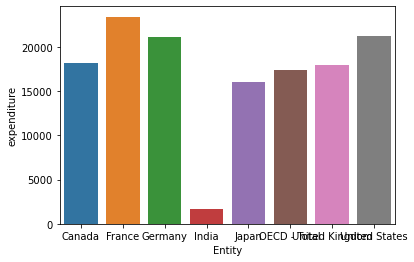

In [6]:
sns.barplot(x='Entity',y='expenditure',data=per_capita_expenditure_subset[per_capita_expenditure_subset['Year'] == 2015])

In [7]:
postwar_earliest_entities_df[postwar_earliest_entities_df['Year'] == 2000]
sns.barplot(x='Entity', 
            y='Expenditure', 
            data=postwar_earliest_entities_df[postwar_earliest_entities_df['Year'] == 2000])

NameError: name 'postwar_earliest_entities_df' is not defined

In [ ]:
pce = per_capita_expenditure
pwee = postwar_earliest_entities_df
pwee.head()

def expenditure_change(entities):
    for entity in entities['Entity'].unique():
        print(entity)
        group = entities['Entity'] == entity
        s = pd.Series([group.min(), group.max()])
        return s
        # return pd.Series([entities[entities['Entity'] == entity].min()['Expenditure'], entities[entities['Entity'] == entityentity].max()['Expenditure']]).pct_change()

# expenditure_change(pwee)
txt = "Country: {country}, Change: {change}"
countries_with_change: list = []
# for entity in ['Brazil', 'Canada']:
for entity in pwee['Entity'].unique():
    country = pwee[pwee['Entity'] == entity]
    country_min = country.min()
    country_max = country.max()
    min_ex = country_min['Expenditure']
    max_ex = country_max['Expenditure']
    change = pd.Series([min_ex, max_ex]).pct_change()[1]
    countries_with_change.append([entity, change])
    # print(txt.format(country=entity, change=change))

for [k,v] in countries_with_change:
    print(txt.format(country=k, change=v))
# pwee[pwee['Entity'] == 'Canada'].min()['Expenditure']
# pwee[pwee['Entity'] == 'Canada'].max()['Expenditure']
# pwee.apply(expenditure_change, axis=1)
# expenditure_change(pwee[pwee['Entity'] == 'Brazil'])

In [ ]:
# s2 = pd.Series(countries_with_change.values(), index=countries_with_change.keys())
df = pd.DataFrame.from_records(countries_with_change, columns=['Country', 'Change'])
sns.barplot(x='Country', y='Change', data=df)

In [ ]:
se = pd.read_csv('social-expenditure-as-percentage-of-gdp.csv')
se.head()

In [15]:
# try out piping
earliest_entities_df.head()
ee_df = earliest_entities_df
ee_df.query('Year > 1900')

,Entity,Code,Year,Expenditure
79,Argentina,ARG,1901,11.40432
80,Argentina,ARG,1902,12.62946
81,Argentina,ARG,1903,11.02660
82,Argentina,ARG,1904,10.09434
83,Argentina,ARG,1905,12.44833
...,...,...,...,...
6846,United States,USA,2007,39.72843
6847,United States,USA,2008,41.82761
6848,United States,USA,2009,45.15777
6849,United States,USA,2010,45.07137


In [21]:
ee_df.groupby('Entity').agg({'Expenditure': sum}).sort_values('Expenditure')

,Expenditure
Entity,
Russia,1141.721237
Peru,1468.933050
Mexico,1567.791664
India,1805.718135
Switzerland,1878.476573
Argentina,1967.647531
Japan,2060.326389
Chile,2306.815919
Brazil,2361.232241


,Entity,Code,Year,Expenditure
58,Argentina,ARG,1880,10.18703
59,Argentina,ARG,1881,10.60800
60,Argentina,ARG,1882,12.98165
61,Argentina,ARG,1883,12.59537
62,Argentina,ARG,1884,12.52486
...,...,...,...,...
6846,United States,USA,2007,39.72843
6847,United States,USA,2008,41.82761
6848,United States,USA,2009,45.15777
6849,United States,USA,2010,45.07137
